In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmath
import pandas as pd
from scipy.io import wavfile

# Лабораторная работа 2.6
В файле ’ecg.dat’ записана электрокардиограмма (ЭКГ), существенно искаженная сетевой наводкой. Произведена фильтрация сигнала ЭКГ.

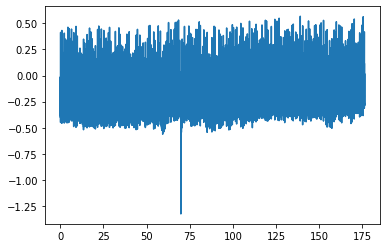

In [2]:
data = pd.read_csv('./ecg.dat', sep=" ", names=["time", "value"])
T = data.time[1] - data.time[0]
Fs = 1 / T
N = len(data.value)
plt.plot(data.time, data.value)

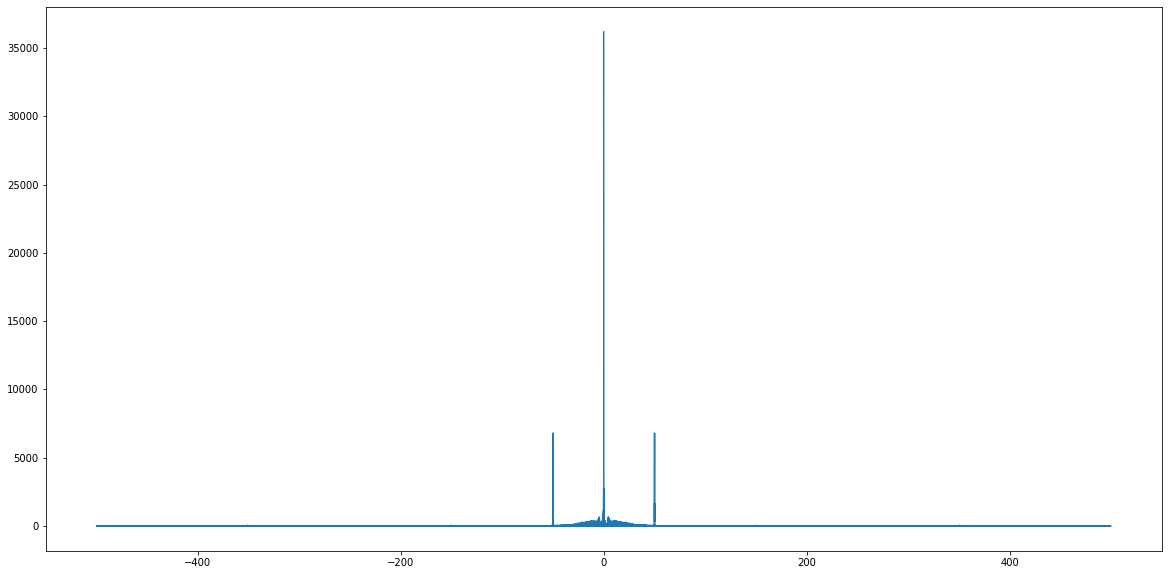

In [27]:
# до фильтрации
ft = np.fft.fft(data.value)
freqs = np.fft.fftfreq(len(fy), d=1/Fs)

plt.figure(figsize=(20, 10))
plt.plot(freqs, abs(fy))

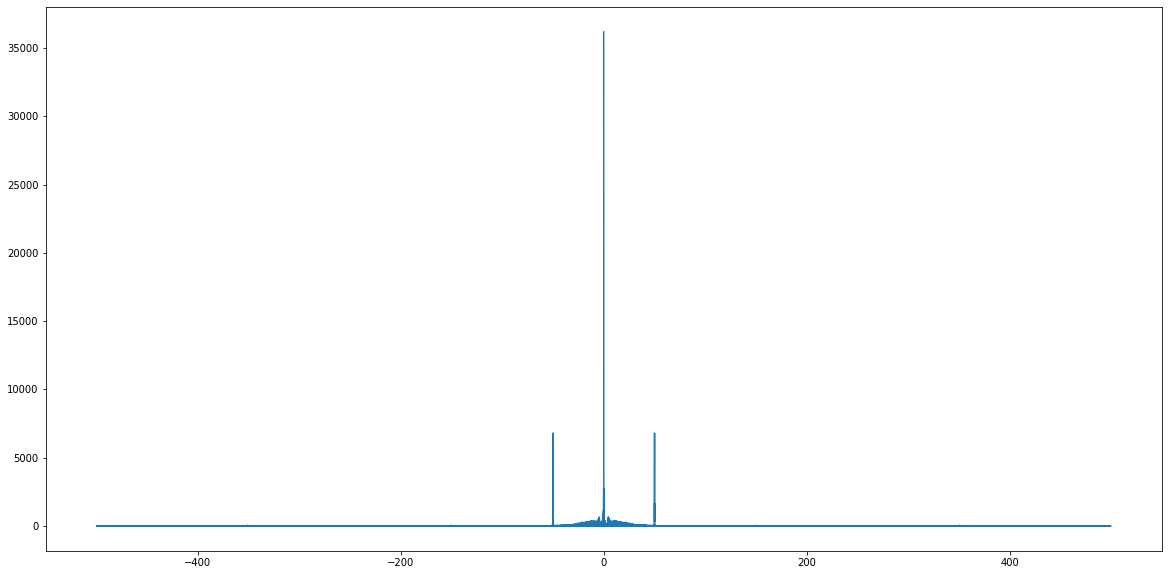

In [28]:
# фильтрация
fltr = 1400
fltr_ft = []
for i in range(len(ft)):
    if abs(freqs[i]) > fltr:
        fltr_ft.append(0)
    else:
        fltr_ft.append(abs(ft[i]))

plt.figure(figsize=(20, 10))
plt.plot(freqs, fltr_ft)

Text(0.5, 1.0, 'Filtered signal')

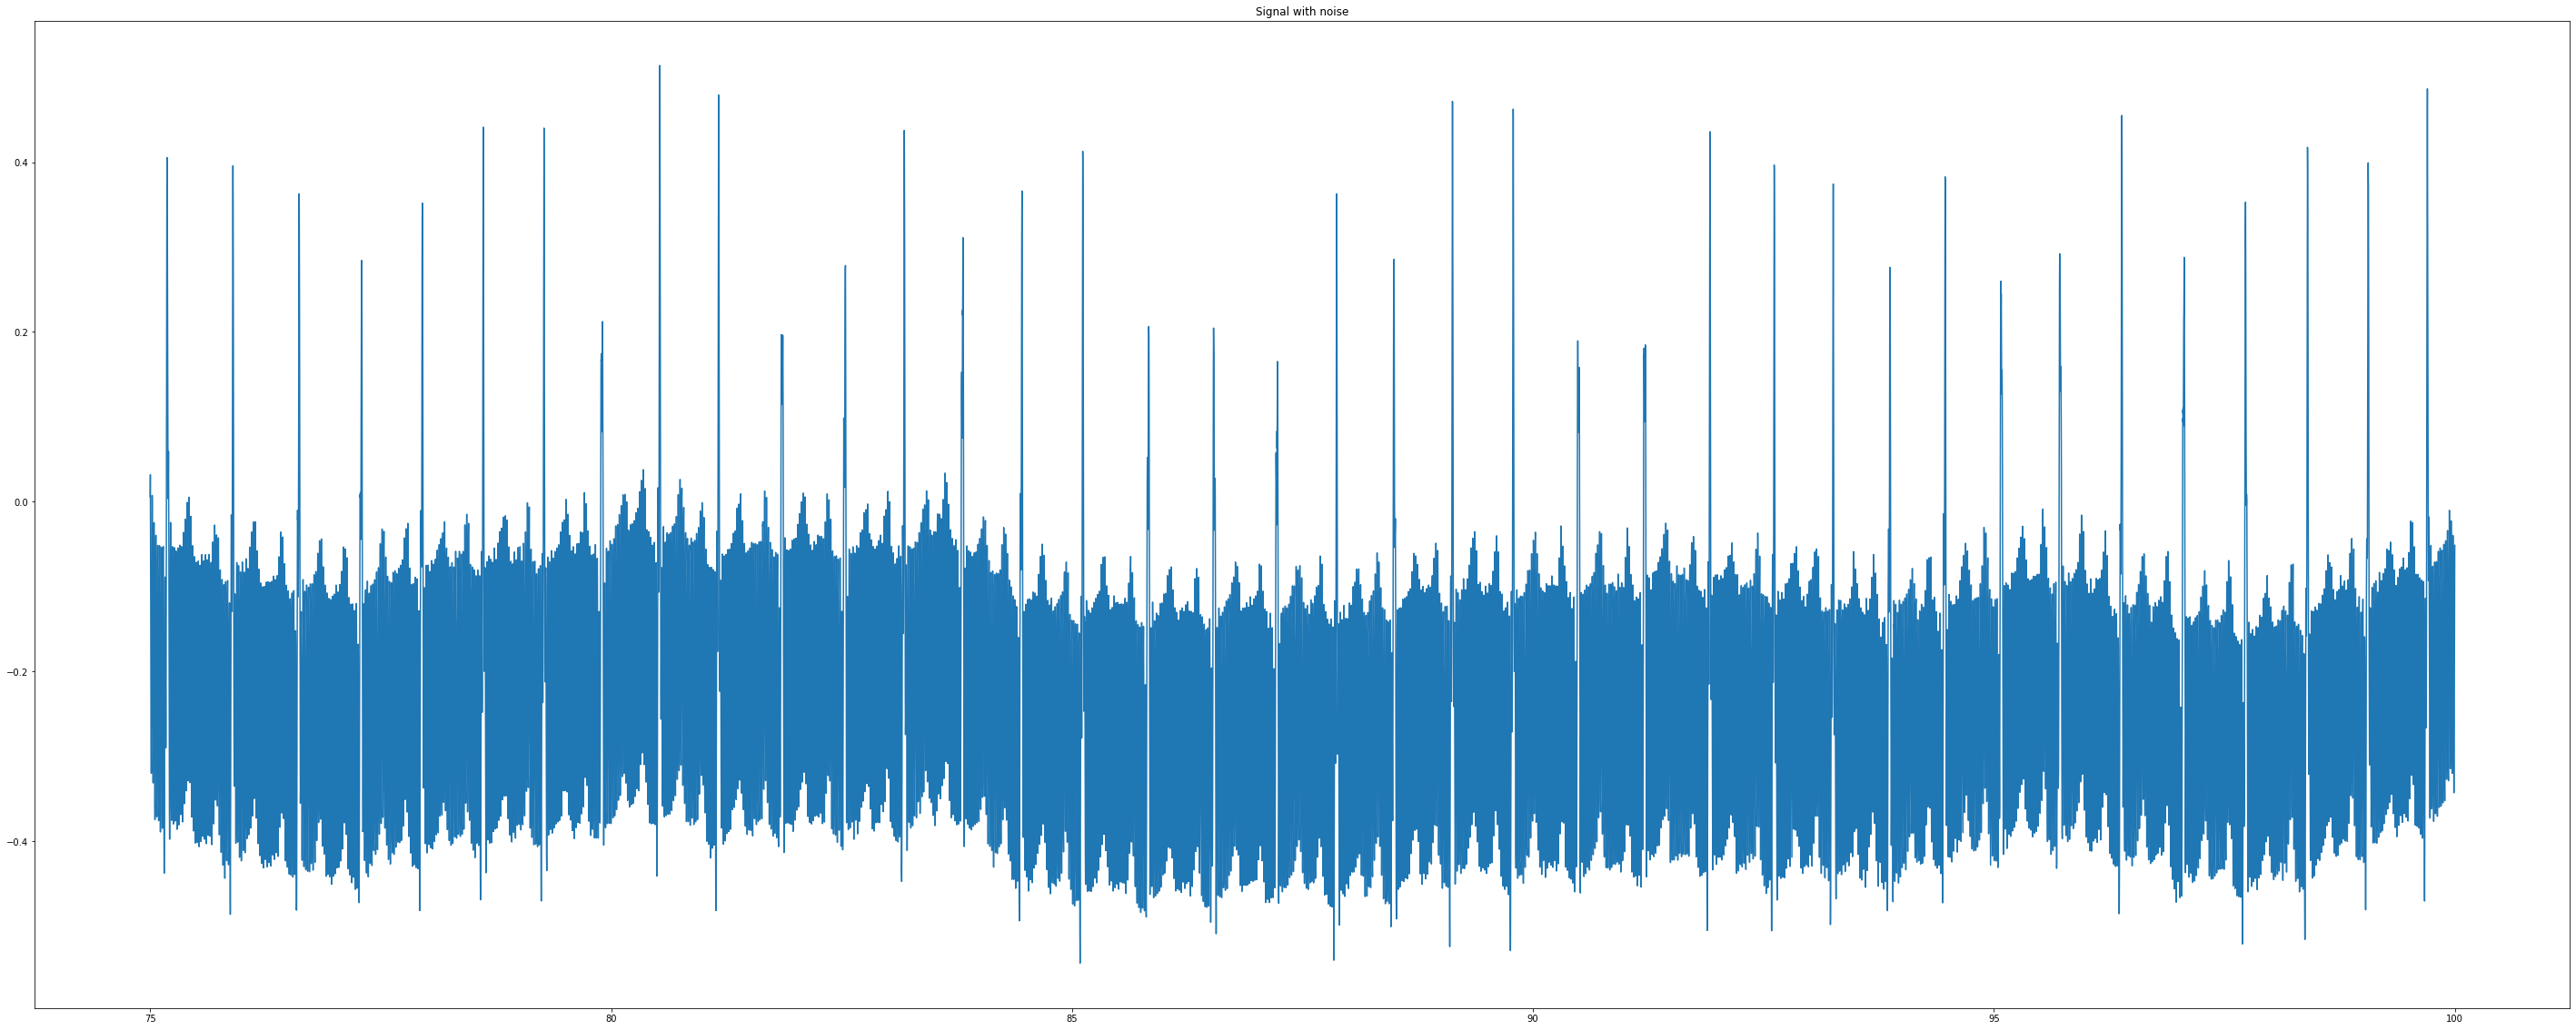

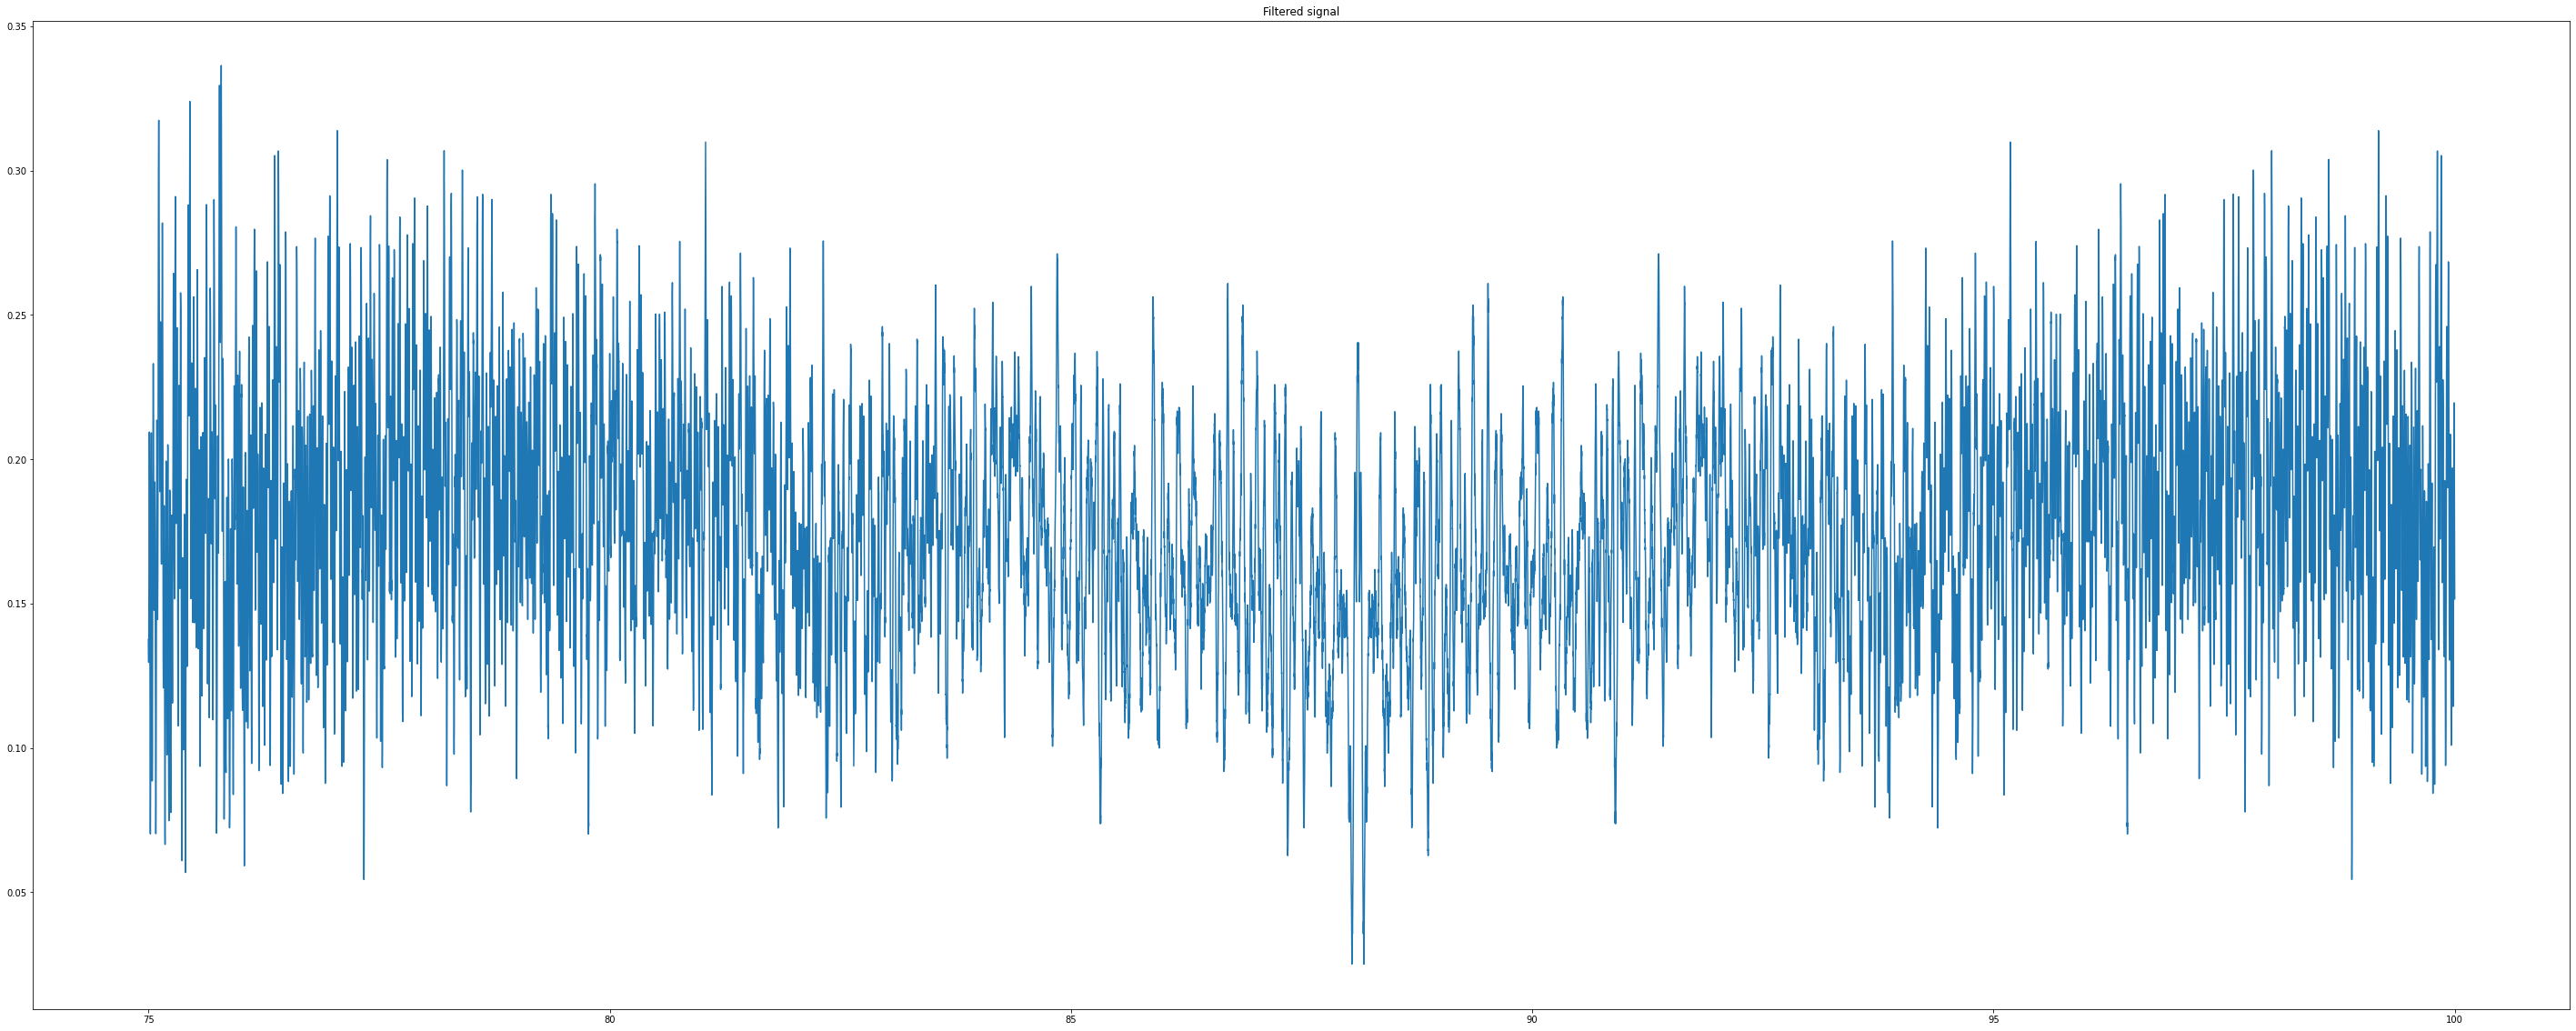

In [32]:
yans = np.fft.ifft(fltr_ft)
data_ans = []
for i in yans:
    data_ans.append(i.real)
    
plt.figure(figsize=(50,20))
plt.plot(data.time[75000:100000], data.value[75000:100000])
plt.title("Signal with noise")
plt.figure(figsize=(50,20))
plt.plot(data.time[75000:100000], data_ans[75000:100000])
plt.title("Filtered signal")